# Установка библиотек

In [ ]:
#!git clone https://github.com/huggingface/transformers
#%cd transformers/examples/research_projects/lxmert

/home/nmandreev/transformers/examples/research_projects/lxmert


In [ ]:
ls

annotations/                  modified/                val2014/
annotations_trainval2014.zip  modified_CLAHE/          val2014.zip
attributes_vocab.txt          modified_GB/             VQA_classes_1.ipynb
data/                         notebook-404016.log      VQA_classes_2.ipynb
loader.py                     notebook-404075.log      VQA_classes_3.ipynb
load_mover.py                 notebook-404078.log      VQA_classes_4.ipynb
log_CLAHE.txt                 objects_vocab.txt        VQA_classes.ipynb
log_GB.txt                    trainval_label2ans.json  wget-log
log.txt                       transformers/


In [ ]:
!pip install transformers


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/linux-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/linux-64'



Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -U albumentations

Defaulting to user installation because normal site-packages is not writeable
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#!pip install -U easynmt

     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 68 kB 7.0 MB/s 
  Using cached pybind11-2.7.1-py2.py3-none-any.whl (200 kB)
  Created wheel for easynmt: filename=EasyNMT-2.0.1-py3-none-any.whl size=15446 sha256=4a6e65584c41fdccdde3776c0aeb7956008c5fe40cb59cb3ae5a99c779fd5cc8
  Stored in directory: /root/.cache/pip/wheels/fb/42/fb/b7711d3296456d5f74e6e265dbdb0e3142158f1bb50382caef
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3092197 sha256=9726460be35ddb6c8918e68eb700007dbc5f0f8856aff88743eeabf2c1805623
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built easynmt fasttext


In [ ]:
#!pip install textattack

     |████████████████████████████████| 361 kB 5.1 MB/s 
     |████████████████████████████████| 270 kB 60.8 MB/s 
     |████████████████████████████████| 59 kB 7.7 MB/s 
     |████████████████████████████████| 69 kB 8.1 MB/s 
     |████████████████████████████████| 769 kB 50.7 MB/s 
     |████████████████████████████████| 319 kB 57.3 MB/s 
     |████████████████████████████████| 101 kB 12.5 MB/s 
     |████████████████████████████████| 269 kB 67.0 MB/s 
     |████████████████████████████████| 264 kB 77.9 MB/s 
     |████████████████████████████████| 243 kB 76.2 MB/s 
     |████████████████████████████████| 123 kB 61.9 MB/s 
     |████████████████████████████████| 1.2 MB 34.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 788 kB 60.9 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 48 kB 6.4 MB/s 
     |███████

In [ ]:
#!pip install textattack --upgrade

In [ ]:
#!pip install colour

^C
ERROR: Operation cancelled by user


## Первоначальная загрузка данных

In [ ]:
#!wget https://nlp.cs.unc.edu/data/lxmert_data/vqa/nominival.json -P  data/
#!wget https://nlp.cs.unc.edu/data/lxmert_data/vqa/minival.json -P data/

--2021-10-27 14:24:16--  https://nlp.cs.unc.edu/data/lxmert_data/vqa/nominival.json
Resolving nlp.cs.unc.edu (nlp.cs.unc.edu)... 152.2.128.53
Connecting to nlp.cs.unc.edu (nlp.cs.unc.edu)|152.2.128.53|:443... ^C
--2021-10-27 14:26:18--  https://nlp.cs.unc.edu/data/lxmert_data/vqa/minival.json
Resolving nlp.cs.unc.edu (nlp.cs.unc.edu)... 152.2.128.53
Connecting to nlp.cs.unc.edu (nlp.cs.unc.edu)|152.2.128.53|:443... ^C


In [ ]:
#!wget http://images.cocodataset.org/zips/val2014.zip
#!unzip -q val2014.zip

--2021-10-07 10:14:29--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.228.136
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.228.136|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  30.7MB/s    in 3m 5s   

2021-10-07 10:17:35 (34.2 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
#!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
#!unzip -q annotations_trainval2014.zip

In [ ]:
import json
from IPython.display import Image


with open("annotations/instances_val2014.json", "r") as read_file:
    keyp = json.load(read_file)

cats = keyp['categories']
annos = keyp['annotations']

In [ ]:
from collections import Counter

cnt = Counter()
for a in annos:
    cnt[a['image_id']] += 1

super = Counter()
for c in cats:
    super[c['supercategory']] += 1
super

Counter({'person': 1,
         'vehicle': 8,
         'outdoor': 5,
         'animal': 10,
         'accessory': 5,
         'sports': 10,
         'kitchen': 7,
         'food': 10,
         'furniture': 6,
         'electronic': 6,
         'appliance': 5,
         'indoor': 7})

In [ ]:
annos[0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

In [ ]:
supercats = dict()
for c in cats:
    id = c['id']
    sc = c['supercategory']
    if sc not in supercats:
        supercats[sc] = set()
    supercats[sc].add(id)

catstoimgs = dict()
for sc in supercats:
    catstoimgs[sc] = set()
for sc in supercats:
    for a in annos:
        ctg = a['category_id']
        if ctg in supercats[sc]:
            catstoimgs[sc].add(str(a['image_id']))

In [ ]:
next(iter(catstoimgs['person']))

'322922'

In [ ]:
class DataLoader:
    """
    This class can load all sufficient data
    self.data contains all info about pictures and question for each picture

    structure of each element of self.data:
        - answer_type
        - img_id -- name of image from COCO dataset
        - label -- list of answers with probabilities
        - question_id
        - question_type
        - sent -- question

    """

    def __init__(self):
        with open("data/nominival.json", "r") as read_file:
            self.data = json.load(read_file)

    def show(self):
        data_it = self.data[5]
        img = data_it['img_id']
        display(Image('val2014/' + img + '.jpg'))
        question = data_it['sent']
        print(question)
        answer = data_it['label']
        print(answer)

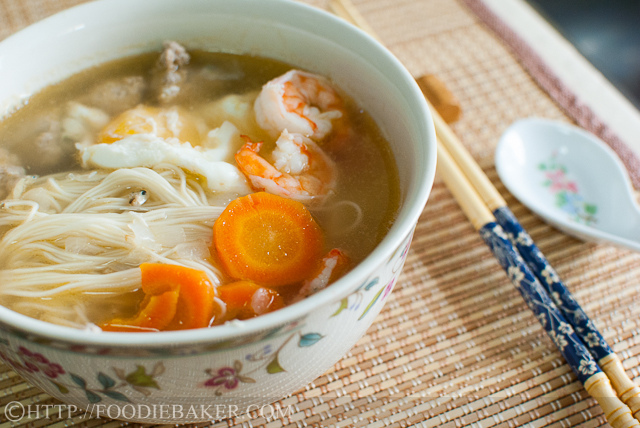

Is this rice noodle soup?
{'yes': 1}


In [ ]:
DL = DataLoader()
DL.show()

Main data container is **catstoimgs**: dictionary that contains each supercategory and a set of image ids for them

# Импорт библиотек

In [ ]:
#!pip install tensorflow_text

     |████████████████████████████████| 4.4 MB 12.4 MB/s 


In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

from colour import Color
#from easynmt import EasyNMT
from scipy.linalg import norm
from sklearn.utils.random import sample_without_replacement
#from textattack.augmentation import Augmenter

In [ ]:
# from textattack.transformations import WordSwap
# from textattack.transformations import WordSwapChangeLocation
# from textattack.transformations import WordSwapChangeName
# from textattack.transformations import WordSwapChangeNumber
# from textattack.transformations import WordSwapContract
# from textattack.transformations import WordSwapEmbedding
# from textattack.transformations import WordSwapExtend
# from textattack.transformations import WordSwapGradientBased
# from textattack.transformations import WordSwapHomoglyphSwap
# from textattack.transformations import WordSwapHowNet
# from textattack.transformations import WordSwapInflections
# from textattack.transformations import WordSwapMaskedLM
# from textattack.transformations import WordSwapNeighboringCharacterSwap
# from textattack.transformations import WordSwapQWERTY
# from textattack.transformations import WordSwapRandomCharacterDeletion
# from textattack.transformations import WordSwapRandomCharacterInsertion
# from textattack.transformations import WordSwapRandomCharacterSubstitution
# from textattack.transformations import WordSwapWordNet

In [ ]:
#from textattack.augmentation import CLAREAugmenter - doesn't work for 
#some reason
# from textattack.augmentation import CharSwapAugmenter
# from textattack.augmentation import CheckListAugmenter
# from textattack.augmentation import DeletionAugmenter
# from textattack.augmentation import EasyDataAugmenter
# from textattack.augmentation import EmbeddingAugmenter
# from textattack.augmentation import WordNetAugmenter

# Функция для визуализации картинок

In [ ]:
def visualize(image):
    # plt.figure(figsize=(10, 10))
    # plt.axis('off')
    # plt.imshow(image)
    display(Image(image))

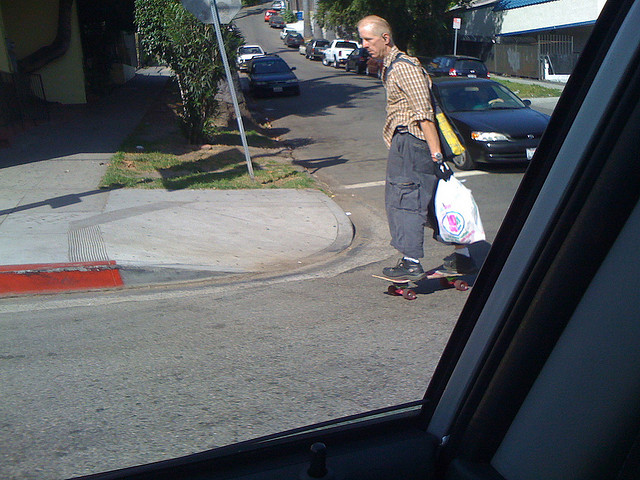

In [ ]:
visualize("val2014/COCO_val2014_000000341645.jpg")

In [ ]:
def format_(img):
    return "val2014/COCO_val2014_" + "{0:0>12}".format(img) + '.jpg'


for img in catstoimgs['person']:
    image = format_(img)
    print(image)
    break

val2014/COCO_val2014_000000322922.jpg


In [ ]:
with open("data/nominival.json", "r") as read_file:
    data = json.load(read_file)

with open("data/minival.json", 'r') as read_file1:
    data1 = json.load(read_file1)

# data contains all info
data += data1

In [ ]:
len(data)

214354

In [ ]:
data[0]

{'answer_type': 'other',
 'img_id': 'COCO_val2014_000000262148',
 'label': {'at table': 0.3, 'down': 1, 'skateboard': 0.3, 'table': 0.3},
 'question_id': 262148000,
 'question_type': 'none of the above',
 'sent': 'Where is he looking?'}

In [ ]:
annos[0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

# Класс для изменения картинок

In [ ]:
class image_attacker:
    """This class defines various methods related to image attacks.

    :param numpy.ndarray image: 3d numpy array of the image that we want to
    attack
    :param numpy.ndarray new_image: 3d numpy array of the changed image, before
    attack it is None
    """

    def __init__(self, image):
        self.image = image
        self.new_image = None

    def get_samples(self, dims=(2, 2), nsamp=1):
        """Method for getting n samples without repetitions for given
        dimensions.

        :param tuple(int, int) dims: shapes or dimensions of an array
        :param int nsamp: nubmer of returned samples
        :returns: array of samples
        """

        idx = sample_without_replacement(np.prod(dims), nsamp)
        return np.vstack(np.unravel_index(idx, dims)).T

    def noise_attack(
        self, low=0, high=31, percent=1, probability=0.1, mode="area"
    ):
        """Method for a noise attack.

        This functions adds some random values to random pixels chosen with
        some probability or to fixed amount of random pixels if "area" mode was
        used.

        :param int low: lowest value that will be added to the pixel
        :param int high: highest value that will be added to the pixel
        :param int percent: percent of image area that will be changed
        (from 0 to 100)
        :param int probability: each pixel will be changed with this
        probability (should be from 0 to 1)
        :param int mode: fixed area of the image will be changed if "area" is
        chosen, for other values probability will be used to change pixels
        :returns numpy.ndarray: changed image after attack
        """

        # Choose amount of random pixels of the image and get their indexes
        total_size = self.image.shape[0] * self.image.shape[1]

        # Choose whether to colour some area or every pixel with
        # some probability.
        if mode == "area":
            # Get indexes of random pixels
            colouring_size = int(total_size * percent / 100)
            idx = self.get_samples(
                (self.image.shape[0], self.image.shape[1]), colouring_size
            )
        else:
            # Get pairs of pixels' coordinates
            pixels = (
                np.mgrid[
                    0 : self.image.shape[0] : 1, 0 : self.image.shape[1] : 1
                ]
                .reshape(2, -1)
                .T
            )
            # Generate probability scores for each pixel from the image and
            # choose those that are allowed for specified probability
            probabilities = np.random.rand(total_size)
            idx_list = np.where(probabilities < probability)[0]
            idx = pixels[idx_list]

        # Add random values to chosen pixels using previous indexes
        new_image = self.image.copy()
        new_image[idx[:, 0], idx[:, 1], 0] += np.random.randint(low, high)
        new_image[idx[:, 0], idx[:, 1], 1] += np.random.randint(low, high)
        new_image[idx[:, 0], idx[:, 1], 2] += np.random.randint(low, high)

        self.new_image = new_image
        return self.new_image

    def colour_pixels_attack(
        self, colour="black", percent=1, probability=0.1, mode="area"
    ):
        """Method for a colouring random pixels attack.

        This functions colors random pixels with given colout. Pixels are
        chosen with some probability or fixed amount of random pixels will be
        chosen if "area" mode was used.

        :param str colour: name of the colour to paint pixels
        :param int percent: percent of image area that will be changed
        (from 0 to 100)
        :param int probability: each pixel will be changed with this
        probability (should be from 0 to 1)
        :param int mode: fixed area of the image will be changed if "area" is
        chosen, for other values probability will be used to change pixels
        :returns numpy.ndarray: changed image after attack
        """
        # Get colour from the library and it's RGB values in a list
        c = Color(colour)
        c = np.array(c.rgb) * 255

        # Choose amount of random pixels of the image and get their indexes
        total_size = self.image.shape[0] * self.image.shape[1]

        # Choose whether to colour some area or every pixel with
        # some probability.
        if mode == "area":
            # Get indexes of random pixels
            colouring_size = int(total_size * percent / 100)
            idx = self.get_samples(
                (self.image.shape[0], self.image.shape[1]), colouring_size
            )
        else:
            # Get pairs of pixel coordinates
            pixels = (
                np.mgrid[
                    0 : self.image.shape[0] : 1, 0 : self.image.shape[1] : 1
                ]
                .reshape(2, -1)
                .T
            )
            # Generate probability scores for each pixel from the image and
            # choose those that are allowed for specified probability
            probabilities = np.random.rand(total_size)
            idx_list = np.where(probabilities < probability)[0]
            idx = pixels[idx_list]

        # Colour chosen pixels
        new_image = self.image.copy()
        new_image[idx[:, 0], idx[:, 1]] = c

        # Save new image in a class
        self.new_image = new_image
        return self.new_image

    def random_pixel_level_attack(self):
        """Method for a random attack from an albumentations module.

        FDA, PixelDistributionAdaptation, HistogramMatching methods are not
        included.

        You can apply a pixel-level transform to any target, and under the
        hood, the transform will change only the input image and return any
        other input targets such as masks, bounding boxes, or keypoints
        unchanged.

        :returns numpy.ndarray: changed image after attack
        """

        # Choose one random transformation from albumentations module
        transform = A.OneOf(
            [
                A.Blur(),
                A.CLAHE(),
                A.ChannelDropout(),
                A.ChannelShuffle(),
                A.ColorJitter(),
                A.Downscale(),
                A.Emboss(),
                A.Equalize(),
                A.FancyPCA(),
                A.FancyPCA(),
                A.GaussNoise(),
                A.GaussianBlur(),
                A.GlassBlur(),
                A.HueSaturationValue(),
                A.ISONoise(),
                A.ImageCompression(),
                A.InvertImg(),
                A.MedianBlur(),
                A.MotionBlur(),
                A.MultiplicativeNoise(),
                A.Normalize(),
                A.Posterize(),
                A.RGBShift(),
                A.RandomBrightnessContrast(),
                A.RandomFog(),
                A.RandomGamma(),
                A.RandomRain(),
                A.RandomShadow(),
                A.RandomSnow(),
                A.RandomSunFlare(),
                A.RandomToneCurve(),
                A.Sharpen(),
                A.Solarize(),
                A.Superpixels(),
                A.ToFloat(),
                A.ToGray(),
                A.ToSepia(),
            ],
            p=1,
        )

        # Apply transformation to the image and save it in the class
        self.new_image = transform(image=self.image)["image"]
        return self.new_image

    def random_spatial_level_attack(self):
        """Method for a random spatial-level attack from an albumentations
        module.

        Spatial-level attack is able to change image sizes or object boundaries
        and other targets.

        :returns numpy.ndarray: changed image after attack
        """

        # Choose one random transformation from albumentations module
        transform = A.OneOf(
            [
                A.Affine(),
                # A.CenterCrop() - need h/w
                A.CoarseDropout(),
                # A.Crop(),
                # A.CropAndPad() - need params
                # A.CropNonEmptyMaskIfExists() - need h/w
                A.ElasticTransform(),
                A.Flip(),
                A.GridDistortion(),
                A.GridDropout(),
                A.HorizontalFlip(),
                A.Lambda(),
                A.LongestMaxSize(),
                A.MaskDropout(),
                A.NoOp(),
                A.OpticalDistortion(),
                A.PadIfNeeded(),
                A.Perspective(),
                A.PiecewiseAffine(),
                # A.RandomCrop() - need h/w
                # A.RandomCropNearBBox() - need box
                A.RandomGridShuffle(),
                # A.RandomResizedCrop() - need h/w
                A.RandomRotate90(),
                A.RandomScale(),
                # A.RandomSizedBBoxSafeCrop() - need h/w
                # A.RandomSizedCrop() - need h/w
                # A.Resize() - need h/w
                A.Rotate(),
                A.SafeRotate(),
                A.ShiftScaleRotate(),
                A.SmallestMaxSize(),
                A.Transpose(),
                A.VerticalFlip(),
            ],
            p=1,
        )

        # Apply transformation to the image and save it in the class
        self.new_image = transform(image=self.image)["image"]
        return self.new_image

# Скачать картинку (и проверить результат атаки)

In [ ]:
# def download_images(imgs):
#     for name in imgs:
#         img_data = requests.get(
#             "https://vqa.cloudcv.org/media/test2014/COCO_test2014_"
#             + "0" * (12 - len(name))
#             + name
#             + ".jpg"
#         ).content
#         with open(name + ".jpg", "wb") as handler:
#             handler.write(img_data)
#         wget.download(
#             "https://vqa.cloudcv.org/media/test2014/COCO_test2014_"
#             + "0" * (12 - len(name))
#             + name
#             + ".jpg"
#         )

# name = "262567.jpg"
# img_data = requests.get(
#     "https://vqa.cloudcv.org/media/test2014/COCO_test2014_000000262567.jpg"
# ).content
# with open("262567.jpg", "wb") as handler:
#     handler.write(img_data)

# Класс для изменения текстов c помощью переводов

In [ ]:
class tbt_attacker:
    """This class defines translation and back translation method to attack
    texts.

    :param str text: text than we want to attack
    :param str new_text: text than we get after attack
    :param numpy.ndarray languages: list of available languages to translate in
    both directions
    """

    def __init__(self, text):
        self.text = text
        self.new_text = None
        self.languages = np.array([
            'aav', 'af', 'alv', 'ar', 'az', 'bat', 'bcl', 'bem', 'ber', 'bg',
            'bi', 'bnt', 'bzs', 'ca', 'ceb', 'cel', 'chk', 'cpf', 'crs', 'cs', 
            'cus', 'cy', 'da', 'de', 'dra', 'ee', 'efi', 'eo', 'es', 'et',
            'eu', 'euq', 'fi', 'fj', 'fr', 'ga', 'gaa', 'gil', 'gl', 'grk', 
            'guw', 'gv', 'ha', 'hi', 'hil', 'ho', 'ht', 'hu', 'hy', 'id', 'ig',
            'ilo', 'is', 'iso', 'it', 'jap', 'kg', 'kj', 'kqn', 'kwn', 'kwy',
            'lg', 'ln', 'loz', 'lu', 'lua', 'lue', 'lun', 'luo', 'lus', 'mfe',
            'mg','mh', 'mk', 'mkh', 'ml', 'mos', 'mr', 'mt', 'mul', 'ng',
            'nic', 'niu', 'nl', 'nso', 'ny', 'nyk', 'om', 'pag', 'pap', 'phi',
            'pis', 'pon', 'pqe', 'rn', 'rnd', 'roa', 'ru', 'run', 'rw', 'sal',
            'sg', 'sk', 'sm', 'sn', 'sq', 'ss', 'st', 'sv', 'swc', 'ti', 'tiv',
            'tl', 'tll', 'tn', 'to', 'toi', 'tpi', 'trk', 'ts', 'tvl', 'uk',
            'umb', 'ur', 'vi', 'xh', 'zh'
            ])

    def available_languages(self, show=False):
        """Shows all available languages for translation in both directions.

        :param bool show: if True then it will print all languages, otherwise
        returns numpy array of all languages
        :returns None or numpy.array: possible languages
        """
        if show == True:
            print(self.languages)
        else:
            return self.languages

    def tbt_attack(self, language):
        """Translates sentence from english to chosen language, then translates
        it back and returns.

        :param str language: short name of language that user want to use for
        translation.
        :returns str: text after attack
        """
        # Choosing model and translating text then
        model = EasyNMT("opus-mt")
        new_text = model.translate(
            self.text, source_lang="en", target_lang=language
        )
        self.new_text = model.translate(
            new_text, source_lang=language, target_lang="en"
        )
        return self.new_text

    def tbt_random_attack(self):
        """Translates sentence from english to random ;anguage, then translates
        it back and returns.

        :returns str: text after attack
        """
        # Choosing random language
        idx = np.random.choice(self.languages.shape[0], 1, replace=False)
        language = self.languages[idx][0]
        # Choosing model and translating text then
        model = EasyNMT("opus-mt")
        new_text = model.translate(
            self.text, source_lang="en", target_lang=language
        )
        self.new_text = model.translate(
            new_text, source_lang=language, target_lang="en"
        )
        return self.new_text

In [ ]:
#Translate a single sentence to German
text_attack = tbt_attacker('This is a sentence we want to translate to German')

print(text_attack.tbt_random_attack())

100%|██████████| 11.9k/11.9k [00:00<00:00, 6.59MB/s]



We want to translate this phrase into German.


# Класс для изменения текстов c QData

In [ ]:
class qdata_attacker:
    """This class contains various methods for data augmentation from QData.

    :param str text: text than we want to attack
    :param str new_text: text than we get after attack
    :param numpy.array methods: array of various text transformations
    :param numpy.array augmenters: array of various prebuild augmenters
    """

    def __init__(self, text):
        self.text = text
        self.new_text = None
        self.methods = np.array(
            [ 
             WordSwapChangeLocation, WordSwapChangeName, 
             WordSwapChangeNumber, WordSwapContract, WordSwapEmbedding, 
             WordSwapExtend, #WordSwapGradientBased, WordSwap, 
             WordSwapHomoglyphSwap, 
             #WordSwapHowNet, WordSwapInflections, 
             WordSwapMaskedLM, WordSwapNeighboringCharacterSwap, 
             WordSwapQWERTY, WordSwapRandomCharacterDeletion, 
             WordSwapRandomCharacterInsertion, 
             WordSwapRandomCharacterSubstitution, WordSwapWordNet
            ]
        )
        self.augmenters = np.array(
            [
             CharSwapAugmenter, CheckListAugmenter, DeletionAugmenter, 
             EasyDataAugmenter, EmbeddingAugmenter, WordNetAugmenter
            ]
        )

    def random_attack(
        self, pct_words_to_swap=0.2, transformations_per_example=1
    ):
        """Chooses random transformation method from text_attacker and applies
        it to the given text.

        :param int pct_words_to_swap: percentage of words to swap per augmented
        example
        :param int transformations_per_example: Maximum number of augmentations
        :returns str new_text: augmented text after attack
        """
        # Choosing random transformation method
        idx = np.random.choice(self.methods.shape[0], 1, replace=False)
        transformation = self.methods[idx][0]()
        # Changing text
        augmenter = Augmenter(
            transformation=transformation,
            pct_words_to_swap=pct_words_to_swap,
            transformations_per_example=transformations_per_example,
        )
        self.new_text = augmenter.augment(self.text)
        return self.new_text

    def random_augmenter_attack(
        self, pct_words_to_swap=0.2, transformations_per_example=1
    ):
        """Chooses random prebuild augmenter from text_attacker and applies it
        to the given text.

        :param int pct_words_to_swap: percentage of words to swap per augmented
        example
        :param int transformations_per_example: Maximum number of augmentations
        :returns str new_text: augmented text after attack
        """
        # Choosing random augmenter
        idx = np.random.choice(self.augmenters.shape[0], 1, replace=False)
        augmenter = self.augmenters[idx][0]
        # Changing text
        augmenter = augmenter(
            pct_words_to_swap=pct_words_to_swap,
            transformations_per_example=transformations_per_example,
        )
        self.new_text = augmenter.augment(self.text)
        return self.new_text

    def specific_attack(
        self,
        transformation=None,
        pct_words_to_swap=0.2,
        transformations_per_example=1,
    ):
        """Method for augmenting text with a specified transformation method.

        :param object transformation: specified transformation with params
        :param int pct_words_to_swap: percentage of words to swap per augmented
        example
        :param int transformations_per_example: Maximum number of augmentations
        :returns str new_text: augmented text after attack
        """
        # Change to default transformation if None
        if transformation is None:
            transformation = WordSwapChangeLocation()
        # Changing text
        augmenter = Augmenter(
            transformation=transformation,
            pct_words_to_swap=pct_words_to_swap,
            transformations_per_example=transformations_per_example,
        )
        self.new_text = augmenter.augment(self.text)
        return self.new_text

In [ ]:
#Translate a single sentence to German
qdata_attack = qdata_attacker('This is a sentence we would like to translate to German')

print(qdata_attack.random_attack())

['This is amp sentence we would like to understand to German']


# Класс для изменения текстов с NLPAUG

In [ ]:
!pip install nlpaug

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw

In [ ]:
class nlpaug_attacker:

    def __init__(self, text):
        self.text = text
        self.augmented_text = None

    def char_aug(self, action=None):
        """
        action: insert, substitute(None), swap, delete
        """

        if action is None:
            aug = nac.RandomCharAug(action="substitute")
        else:
            aug = nac.RandomCharAug(action=action)
        self.augmented_text = aug.augment(text)
        return self.augmented_text

    def word_aug(self, action=None):
        """
        action: crop, swap, delete(None)
        """
        if action is None:
            aug = naw.RandomWordAug()
        else:
            aug = naw.RandomWordAug(action=action)
        self.augmented_text = aug.augment(text)
        return self.augmented_text

# Класс для подсчёта дистанций между картинками

In [ ]:
class image_distance_counter:
    """This class defines various methods for calculating distances.

    :param numpy.ndarray image: 3d numpy array of the image that we will attack
    :param numpy.ndarray new_image: 3d numpy array of the changed image
    """

    def __init__(self, old_image, new_image):
        self.old_image = old_image
        self.new_image = new_image

    def difference(self):
        """Method that counts total difference between pixels of images."""
        return norm((self.new_image - self.old_image).ravel(), 2)

    def difference_per_pixel(self):
        """Method that counts difference per pixel between pixels of images."""
        return (
            norm((self.new_image - self.old_image).ravel(), 2) / new_image.size
        )

# Класс для подсчёта дистанций между текстами

In [ ]:
#!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 27.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=a276696836acd58c5c34aadfd65f695bca46112462d9e1c76deeac1570cb21b9
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [ ]:
#!pip install bert-score

In [ ]:
#!pip install moverscore

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
^C
ERROR: Operation cancelled by user


In [ ]:
#!pip install pytorch_pretrained_bert

     |████████████████████████████████| 123 kB 11.4 MB/s 
     |████████████████████████████████| 131 kB 42.2 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 8.0 MB 41.7 MB/s 
     |████████████████████████████████| 138 kB 33.5 MB/s 
     |████████████████████████████████| 127 kB 35.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# !git clone https://github.com/google-research/bleurt.git
# %cd bleurt
# !pip install .

In [ ]:
from moverscore import get_idf_dict, word_mover_score
#from sentence_transformers import SentenceTransformer
#from bleurt import score
from collections import defaultdict

Model name '/home/nmandreev/.moverscore' was not found in model name list (bert-base-uncased, bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased, bert-base-multilingual-cased, bert-base-chinese). We assumed '/home/nmandreev/.moverscore/vocab.txt' was a path or url but couldn't find any file associated to this path or url.


FileNotFoundError: [Errno 2] No such file or directory: '/home/nmandreev/.moverscore/bert_config.json'

In [ ]:
class text_distance_counter:
    """This class defines various methods for calculating distances between 
    texts.

    :param string text: text of the question that we will attack
    :param string new_text: changed question
    """

    def __init__(self, text, new_text):
        self.text = text
        self.new_text = new_text

    def cosine(self):
        model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
        sentences = [self.text, self.new_text]
        sentence_embeddings = model.encode(sentences)
        return sentence_embeddings[0].dot(sentence_embeddings[1])

    def bleurt(self):
        checkpoint = "bleurt/test_checkpoint"
        references = [self.text]
        candidates = [self.new_text]

        scorer = score.BleurtScorer(checkpoint)
        scores = scorer.score(references=references, candidates=candidates)
        return scores

    def moverscore(self):
        idf_dict_hyp = get_idf_dict(self.text)
        idf_dict_ref = get_idf_dict(self.new_text)

        references = [self.text]
        translations = [self.new_text]

        scores = word_mover_score(references, translations, idf_dict_ref, idf_dict_hyp, \
                          stop_words=[], n_gram=1, remove_subwords=True)

        return scores


# Класс для подсчета метрик (между boxes)


In [ ]:
class metrics:

    def __init__(self, picture_res):
        self.vqa_answers = picture_res[0]
        self.boxes = picture_res[1]

    def IoU(self):
        #boxes: [for original image, for attacked image]
        original = boxes[0]
        attacked = boxes[1]

    def cosine(self):
        pass

# Основной класс для запуска модели


In [ ]:
class model_runner:
    def __init__(self, image_name, question):
        self.image_name = image_name
        self.question = question

    def run_frcnn(self):
#         frcnn_visualizer = SingleImageViz(
#             self.image_name, id2obj=objids, id2attr=attrids
#         )
        # run frcnn
        images, sizes, scales_yx = image_preprocess(self.image_name)
        output_dict = frcnn(
            images=images,
            image_shapes=sizes,
            scales_yx=scales_yx,
            padding="max_detections",
            max_detections=frcnn_cfg.max_detections,
            return_tensors="pt",
        )
        return output_dict

    def run_lxmert(self, output_dict):
        normalized_boxes = output_dict.get("normalized_boxes")
        boxes = output_dict.get("boxes")
        # boxes.append(normalized_boxes)
        features = output_dict.get("roi_features")

        test_question = self.question

        inputs = lxmert_tokenizer(
            test_question,
            padding="max_length",
            max_length=20,
            truncation=True,
            return_token_type_ids=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors="pt",
        )

        # run lxmert(s)
        
        # output_gqa = lxmert_gqa(
        #     input_ids=inputs.input_ids,
        #     attention_mask=inputs.attention_mask,
        #     visual_feats=features,
        #     visual_pos=normalized_boxes,
        #     token_type_ids=inputs.token_type_ids,
        #     return_dict=True,
        #     output_attentions=False,
        # )
        output_vqa = lxmert_vqa(
            input_ids=inputs.input_ids.to('cuda'),
            attention_mask=inputs.attention_mask.to('cuda'),
            visual_feats=features.to('cuda'),
            visual_pos=normalized_boxes.to('cuda'),
            token_type_ids=inputs.token_type_ids.to('cuda'),
            return_dict=True,
            output_attentions=False,
        )
        # get prediction
        pred_vqa = output_vqa["question_answering_score"].argmax(-1)
        # pred_gqa = output_gqa["question_answering_score"].argmax(-1)
        # answers_gqa.append(gqa_answers[pred_gqa])
        answers_vqa = vqa_answers[pred_vqa]
        # print("Question:", test_question)
        # print("prediction from LXMERT GQA:", gqa_answers[pred_gqa])
        # print("prediction from LXMERT VQA:", vqa_answers[pred_vqa])
        return (answers_vqa, boxes)

In [ ]:
%cd transformers/examples/research_projects/lxmert

/home/nmandreev/transformers/examples/research_projects/lxmert


In [ ]:
from IPython.display import clear_output, Image, display
import PIL.Image
import io
import json
import torch
import numpy as np
from processing_image import Preprocess
from visualizing_image import SingleImageViz
from modeling_frcnn import GeneralizedRCNN
from utils import Config
import utils
from transformers import LxmertForQuestionAnswering, LxmertTokenizer
import wget
import pickle
import os


# URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/images/input.jpg",
URL = "https://vqa.cloudcv.org/media/test2014/COCO_test2014_000000262567.jpg"
OBJ_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/objects_vocab.txt"
ATTR_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/attributes_vocab.txt"
GQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/gqa/trainval_label2ans.json"
VQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/vqa/trainval_label2ans.json"

In [ ]:
cd /home/nmandreev/

/home/nmandreev


In [ ]:
objids = []
attrids = []
vqa_answers = []

with open(OBJ_URL.split('/')[-1], 'r') as fin:
    objids = fin.read().strip().split("\n")[0]
with open(ATTR_URL.split('/')[-1], 'r') as fin:
    attrids = fin.read().strip().split("\n")[0]
with open(VQA_URL.split('/')[-1], 'r') as fin:
    vqa_answers = fin.read().strip().split("\n")[0]

In [ ]:
def converter(con):
    x = con[1:-1].split(", ")
    x = [i[1:-1] for i in x]
    return x

objids = converter(objids)
attrids = converter(attrids)
vqa_answers = converter(vqa_answers)

In [ ]:
# load models and model components
frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")
frcnn_cfg.MODEL.DEVICE = 'cuda'

frcnn = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg)

image_preprocess = Preprocess(frcnn_cfg)

lxmert_tokenizer = LxmertTokenizer.from_pretrained("./transformers/examples/research_projects/lxmert/saved/")
#lxmert_gqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-gqa-uncased")
lxmert_vqa = LxmertForQuestionAnswering.from_pretrained("./transformers/examples/research_projects/lxmert/saved/").to('cuda')

loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/nmandreev/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [ ]:
mkdir modified_RBC

In [ ]:
def all(image_name, new_image, que):
    """string image name,  image new_image, string question"""
    model = model_runner(image_name, que)
    out = model.run_frcnn()
    res_old = model.run_lxmert(out)
    
#     if new_image == "":
#         return res_old[0]
    try:
        plt.imsave('modified_RBC/new_' + image_name[8:], new_image)
    except:
        #print(res_old[0])
        return (res_old[0], "")

    model = model_runner("modified_RBC/new_" + image_name[8:], que)
    out = model.run_frcnn()
    res_new = model.run_lxmert(out)

    #m = metrics(res_old, res_new)
    # print(res_old[0], end=" ")
    # print(res_new[0])
    return (res_old[0], res_new[0])
    #t_dist = text_distance_counter(res_old[0], res_new[0])
    #print(t_dist.moverscore())
    #print(m.cosine())
    #print(m.IoU)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Основной запуск:

In [ ]:
len(data)

214354

In [ ]:
def run_all():
        
    #new_image = ""
    total = 0
    right_1 = 0
    right_5 = 0
    right = 0
    
    ans = dict()

    ims = []
    qs = []
    for d in data[:5]:
        img = 'val2014/' + d['img_id'] + '.jpg'
        
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        attack = image_attacker(image)

        transform = A.Compose([
            A.RandomBrightnessContrast(p=1)
        ])
        new_image = transform(image=image)["image"]
        
#         plt.figure(figsize=[12, 12])
#         labs = ['old', 'new']
#         ims = [image, new_image]
#         for i in range(2):
#             plt.subplot(1,2,i+1)
#             plt.title(labs[i])
#             plt.imshow(ims[i])
#         plt.show()
        
        
        que = d['sent']
        true = d['label']
        if len(true) != 0:
            #print(que)
            #print(true)

            res_ = all(img, new_image, que)
            #print(res_[0], res_[1], sep=" , ")
#             if res_ in true:
            if d['img_id'] not in ans:
                ans[d['img_id']] = []
            ans[d['img_id']].append([que, true, res_])
                
#                 if true[res_] == 1:
#                     right_1 += 1
#                 elif true[res_] >= 0.5:
#                     right_5 += 1
#                 else:
#                     right += 1
        #ims.append(img)
        #qs.append(que)
                    
        
#     print("Total:", total)
#     print("Right 1:", right_1)
#     print("Semi-right:", right_5)
#     print("Barely right:", right)
    with open("log_RBC.txt", 'w') as fout:
        for a in ans:
            print(a, ans[a], sep=" ", end="\n", file=fout)

In [ ]:
catstoimgs.keys()

dict_keys(['person', 'vehicle', 'outdoor', 'animal', 'accessory', 'sports', 'kitchen', 'food', 'furniture', 'electronic', 'appliance', 'indoor'])

In [ ]:
%%time

run_all()

In [ ]:
with open('log.txt', 'r') as fin:
    info_ = fin.read().strip().split('\n')

In [ ]:
res_dict = dict()
for i in range(len(info_)):
    res_dict[info_[i].split(' ')[0]] = list(map(float, info_[i].split(" [")[-1][:-1].split(", ")))

In [ ]:
total = 0
for d in data:
    true = d['label']
    if len(true) != 0:
        total += 1

right_1 = 0
right_5 = 0
right = 0

for r in res_dict:
    for _ in res_dict[r]:
        if _ == 1.0:
            right_1 += 1
        elif _ >= 0.5:
            right_5 += 1
        else:
            right += 1
print("Total:", total)
print("Right 1:", right_1, "ratio:", right_1 / total)
print("Semi-right:", right_5, "ratio:", right_5 / total)
print("Barely right:", right, "ratio:", right / total)

Total: 210051
Right 1: 124644 ratio: 0.593398746018824
Semi-right: 18813 ratio: 0.08956396303754803
Barely right: 13462 ratio: 0.06408919738539688
